## Records audio
Records in "interval" seconds for "length" seconds for an "amount" number of audio files, and stores them in the current directory labeled as "audioSample{x}.wav". The save function can save in multiple formats 

In [1]:
from waggle.data.audio import Microphone
from scipy.io import wavfile
import time

using backwards compatible implementation of time_ns


In [2]:
amount = 2 # how many times the microphone should record
interval = 5 # the pause in seconds between each recording
length = 10 # how long the microphone should record

In [3]:
microphone = Microphone()

num = 0
while True:
    sample = microphone.record(length)
    sample.save(f"audioSample{num}.wav")
    time.sleep(interval)
    
    if num == amount - 1:
        break
        
    num += 1

## Access audio data
Returns the data, timestamp, and samplerate of a singular audio file

In [4]:
import soundfile
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file = "audioSample0.wav"
data1, samplerate1 = soundfile.read(file)
timestamp = Path(file).stat().st_mtime_ns
print(f'samplerate: {samplerate1} \n timestamp: {timestamp} \ndata: {data1}')

samplerate: 48000 
 timestamp: 1628191277274349883 
data: [0. 0. 0. ... 0. 0. 0.]


## Access audio data visually 
Returns the data, timestamp, and samplerate of multiple audio files within a directory, along with the data graphed

Make sure to install the necessary packages: `pip install librosa`

In [6]:
from waggle.data.audio import AudioFolder

samplerate: 48000 
 timestamp: 1628191277274349883 
data in integer type: [0 0 0 ... 0 0 0]


samplerate: 48000 
 timestamp: 1628191277274349883 
data in floating point type: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]




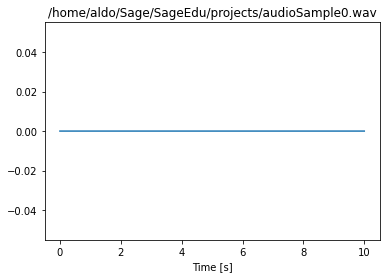

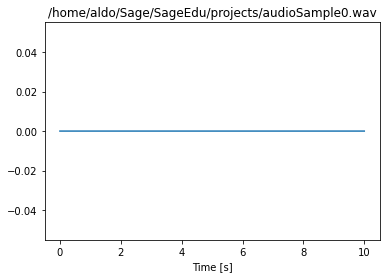

samplerate: 48000 
 timestamp: 1628191292386624207 
data in integer type: [0 0 0 ... 0 0 0]


samplerate: 48000 
 timestamp: 1628191292386624207 
data in floating point type: [[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]




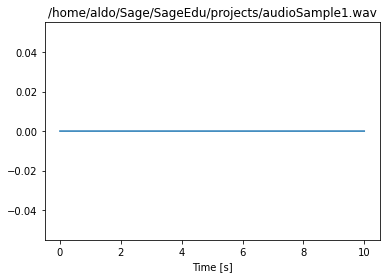

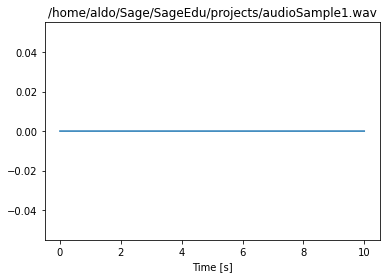

In [7]:
dataset = AudioFolder(".") # "." is the current directory
x = 0
for sample in dataset:
    link = str(dataset.files[x])
    (samplerate, data) = wavfile.read(dataset.files[x])
    print(f'samplerate: {samplerate} \n timestamp: {sample.timestamp} \ndata in integer type: {data}\n\n')
    print(f'samplerate: {sample.samplerate} \n timestamp: {sample.timestamp} \ndata in floating point type: {sample.data}\n\n')
    time = np.arange(0, len(data) / samplerate, 1/samplerate)
    time2 = np.arange(0, len(sample.data) / sample.samplerate, 1/sample.samplerate)
    # time = np.linspace(0, len(data) / samplerate, len(data)) alternative way of organizing data
    plt.figure(x)
    plt.title(link)
    plt.xlabel("Time [s]")
    plt.plot(time, data)
    plt.show()
    
    plt.figure(x)
    plt.title(link)
    plt.xlabel("Time [s]")
    plt.plot(time2, sample.data)
    plt.show()
    x += 1

## Delete files
Run the bottom code to delete the saved audio files in the directory this notebooks sits in

In [8]:
import os

In [9]:
for x in range(amount):
    os.unlink(f"audioSample{x}.wav")